In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from testing.leandro.tools import *
from omegaconf import OmegaConf
from data._main import get_dataset
from testing.leandro.plots import *
import pandas as pd
%matplotlib inline

In [3]:
# Real data
config = OmegaConf.load("/home/lrvnc/projects/worm-graph/conf/dataset.yaml")
print("\nconfig:\n\t", OmegaConf.to_yaml(config), end="\n\n")
dataset = get_dataset(config)
oneWorm = dataset['worm0']
caData = oneWorm['smooth_calcium_data']


config:
	 dataset:
  name:
  - Kato2015


Chosen dataset(s): ['Kato2015']
Num. worms: 12



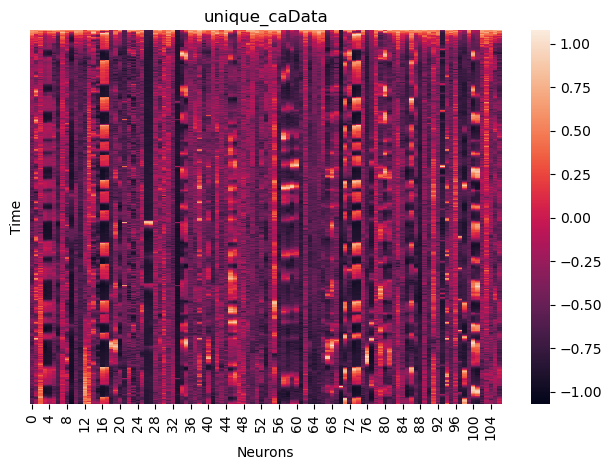

In [4]:
unique_idx = np.where(oneWorm['neurons_mask']==True)[0]
idx2unique = {pos: idx for pos, idx in enumerate(unique_idx)}
unique_caData= caData[:, oneWorm['neurons_mask']]
plotHeatmap(unique_caData, title="unique_caData", show_yticks=False, show_xticks=True, xlabel='Neurons', ylabel='Time')

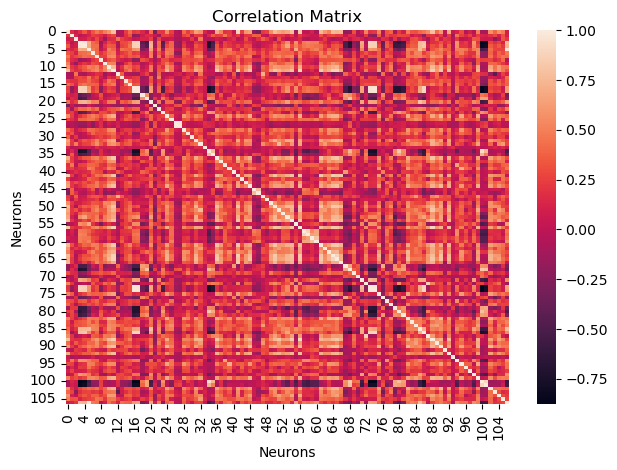

In [5]:
corr_matrix = correlation_matrix(unique_caData)
plotHeatmap(corr_matrix, title="Correlation Matrix", show_xticks=True, show_yticks=True, xlabel='Neurons', ylabel='Neurons')

In [6]:
high_corr = np.where(corr_matrix > 0.75)
low_corr = np.where(corr_matrix < -0.75)

hcorr, lcorr = [], []

for i in range(len(high_corr[0])):
    if high_corr[0][i] != high_corr[1][i]:
        hcorr.append([high_corr[0][i], high_corr[1][i]])

for i in range(len(low_corr[0])):
    if low_corr[0][i] != low_corr[1][i]:
        lcorr.append([low_corr[0][i], low_corr[1][i]])

hcorr = np.array(hcorr)
lcorr = np.array(lcorr)

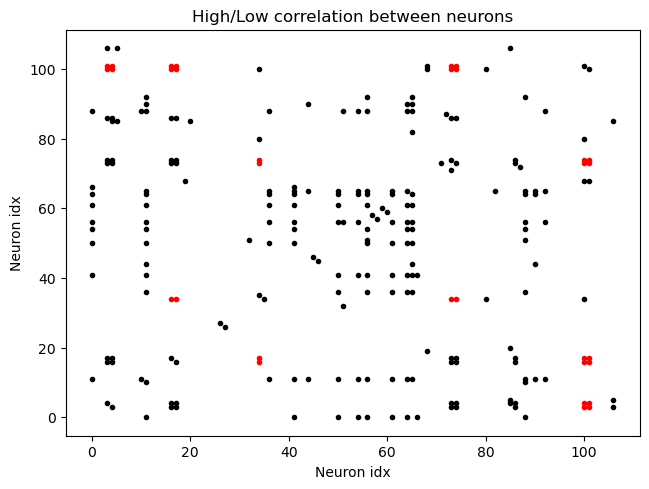

In [7]:
plt.plot(hcorr[:, 0], hcorr[:, 1], '.', color='black', label='High correlation')
plt.plot(lcorr[:, 0], lcorr[:, 1], '.', color='red', label='Low correlation')
#plt.legend()
plt.title("High/Low correlation between neurons")
plt.tight_layout()
plt.ylabel("Neuron idx")
plt.xlabel("Neuron idx")
plt.show()

Is it consistent for all worms?

In [8]:
def corr_oneWorm(oneWorm):

    caData = oneWorm['smooth_calcium_data']
    unique_idx = np.where(oneWorm['neurons_mask'] == True)[0]
    idx2unique = {pos: idx for pos, idx in enumerate(unique_idx)}
    unique_caData = caData[:, oneWorm['neurons_mask']]

    corr_matrix = correlation_matrix(unique_caData)

    high_corr = np.where(corr_matrix > 0.75)
    low_corr = np.where(corr_matrix < -0.75)

    hcorr, lcorr = [], []

    for i in range(len(high_corr[0])):
        if high_corr[0][i] != high_corr[1][i]:
            hcorr.append([high_corr[0][i], high_corr[1][i]])

    for i in range(len(low_corr[0])):
        if low_corr[0][i] != low_corr[1][i]:
            lcorr.append([low_corr[0][i], low_corr[1][i]])

    hcorr_unique = np.array(hcorr).copy()
    hcorr = np.apply_along_axis(lambda x: [unique_idx[x[0]], unique_idx[x[1]]], 1, hcorr_unique)
    lcorr_unique = np.array(lcorr).copy()
    lcorr = np.apply_along_axis(lambda x: [unique_idx[x[0]], unique_idx[x[1]]], 1, lcorr_unique)

    return {
        'coor_matrix': corr_matrix,
        'hcorr': hcorr,
        'hcorr_unique': hcorr_unique,
        'lcorr': lcorr,
        'lcorr_unique': lcorr_unique
    }

corr_data = {}

for wormID in dataset.keys():
    oneWorm = dataset[wormID]
    corr_data[wormID] = corr_oneWorm(oneWorm)

df = pd.DataFrame(corr_data)
df.head()

,worm0,worm1,worm2,worm3,worm4,worm5,worm6,worm7,worm8,worm9,worm10,worm11
coor_matrix,"[[1.0, 0.17427975777634783, 0.0607258018694573...","[[1.0, 0.08661510784181665, 0.5445990960505208...","[[1.0, 0.684207467561403, 0.7258360684034803, ...","[[1.0, -0.13214714720140455, -0.44198811295631...","[[1.0, 0.3126747128488153, 0.3307374318733462,...","[[1.0, 0.2279651437317622, 0.17945527130907143...","[[1.0, -0.09348658460052321, -0.15708067513304...","[[1.0, 0.26378097748855034, -0.225712961222205...","[[1.0, 0.5855714845729073, 0.09225083024261575...","[[1.0, 0.08554962751831593, 0.0982862333230847...","[[1.0, -0.030931353332341597, 0.18691700508535...","[[1.0, 0.10345350623474768, 0.0703173155018849..."
hcorr,"[[5, 36], [5, 113], [5, 139], [5, 146], [5, 15...","[[9, 52], [9, 255], [12, 13], [13, 12], [19, 5...","[[12, 13], [12, 53], [12, 54], [12, 59], [12, ...","[[3, 260], [5, 170], [12, 13], [12, 53], [12, ...","[[7, 40], [7, 47], [7, 109], [7, 123], [12, 13...","[[4, 214], [8, 169], [8, 229], [8, 296], [12, ...","[[12, 13], [12, 53], [12, 54], [12, 59], [12, ...","[[12, 13], [12, 59], [12, 60], [12, 153], [12,...","[[3, 65], [3, 72], [8, 138], [12, 13], [12, 53...","[[12, 13], [12, 53], [12, 54], [12, 59], [12, ...","[[7, 161], [12, 13], [12, 28], [12, 53], [12, ...","[[12, 13], [12, 53], [12, 54], [12, 60], [12, ..."
hcorr_unique,"[[0, 11], [0, 41], [0, 50], [0, 54], [0, 56], ...","[[2, 17], [2, 106], [3, 4], [4, 3], [6, 20], [...","[[1, 2], [1, 13], [1, 14], [1, 17], [1, 76], [...","[[1, 122], [3, 78], [4, 5], [4, 20], [4, 21], ...","[[2, 14], [2, 17], [2, 46], [2, 52], [3, 4], [...","[[1, 106], [3, 76], [3, 112], [3, 147], [4, 5]...","[[2, 3], [2, 19], [2, 20], [2, 23], [2, 24], [...","[[2, 3], [2, 21], [2, 22], [2, 50], [2, 68], [...","[[0, 36], [0, 40], [3, 62], [6, 7], [6, 27], [...","[[1, 2], [1, 20], [1, 21], [1, 25], [1, 26], [...","[[2, 62], [3, 4], [3, 11], [3, 20], [3, 21], [...","[[5, 6], [5, 23], [5, 24], [5, 29], [5, 85], [..."
lcorr,"[[12, 272], [12, 275], [13, 272], [13, 275], [...","[[9, 36], [9, 42], [9, 69], [9, 82], [9, 141],...","[[12, 216], [52, 112], [52, 231], [52, 254], [...","[[12, 275], [13, 213], [13, 214], [13, 275], [...","[[17, 123], [47, 96], [53, 213], [53, 214], [5...","[[8, 72], [8, 297], [12, 213], [12, 239], [13,...","[[12, 56], [12, 189], [12, 213], [12, 214], [1...","[[12, 275], [13, 213], [13, 214], [13, 272], [...","[[8, 16], [8, 33], [8, 114], [8, 132], [8, 166...","[[12, 56], [12, 132], [12, 190], [12, 213], [1...","[[12, 213], [12, 215], [13, 213], [13, 215], [...","[[12, 275], [13, 189], [13, 213], [13, 216], [..."
lcorr_unique,"[[3, 100], [3, 101], [4, 100], [4, 101], [16, ...","[[2, 11], [2, 13], [2, 26], [2, 31], [2, 49], ...","[[1, 88], [12, 40], [12, 94], [12, 102], [36, ...","[[4, 126], [5, 94], [5, 95], [5, 126], [19, 38...","[[7, 52], [17, 40], [19, 88], [19, 89], [19, 9...","[[3, 36], [3, 148], [4, 105], [4, 117], [5, 10...","[[2, 22], [2, 78], [2, 93], [2, 94], [2, 95], ...","[[2, 100], [3, 77], [3, 78], [3, 99], [3, 100]...","[[3, 10], [3, 21], [3, 56], [3, 60], [3, 75], ...","[[1, 23], [1, 56], [1, 81], [1, 93], [1, 94], ...","[[3, 81], [3, 83], [4, 81], [4, 83], [9, 86], ...","[[5, 123], [6, 80], [6, 92], [6, 95], [6, 123]..."


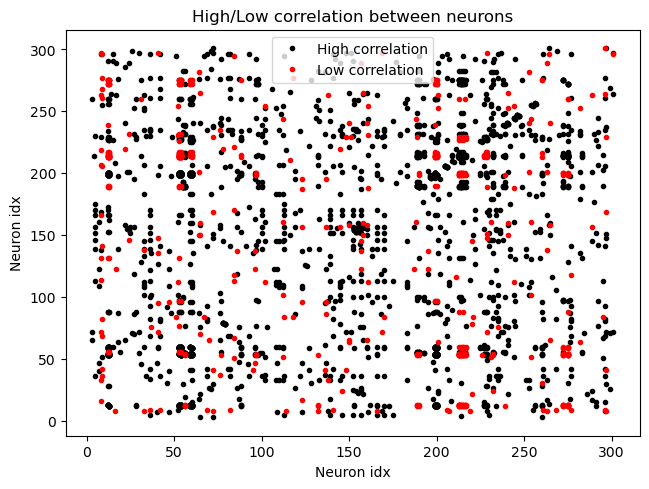

In [9]:
# plot all hcor and lcor points in same plot
hcorr = np.concatenate([corr_data[wormID]['hcorr'] for wormID in corr_data.keys()], axis=0)
lcorr = np.concatenate([corr_data[wormID]['lcorr'] for wormID in corr_data.keys()], axis=0)
plt.plot(hcorr[:, 0], hcorr[:, 1], '.', color='black', label='High correlation')
plt.plot(lcorr[:, 0], lcorr[:, 1], '.', color='red', label='Low correlation')
plt.legend()
plt.title("High/Low correlation between neurons")
plt.tight_layout()
plt.ylabel("Neuron idx")
plt.xlabel("Neuron idx")
plt.show()

In [11]:
# find the biggest value in hcorr and lcorr
hcorr = np.concatenate([corr_data[wormID]['hcorr_unique'] for wormID in corr_data.keys()], axis=0)
lcorr = np.concatenate([corr_data[wormID]['lcorr_unique'] for wormID in corr_data.keys()], axis=0)
np.max(hcorr), np.max(lcorr)

(150, 150)

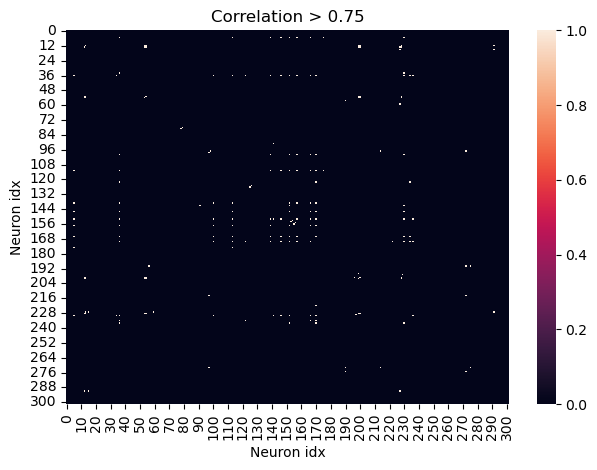

In [30]:
zero_matrix = np.zeros((302, 302))
matrix_sequence = []

for pos in [corr_data[wormID]['hcorr'] for wormID in corr_data.keys()]:
    zero_matrix[pos[:,0], pos[:,1]] += 1
    matrix_sequence.append(zero_matrix.copy())

dynamicHeatmap(matrix_sequence, title="Correlation > 0.75", show_xticks=True, show_yticks=True, xlabel='Neuron idx', ylabel='Neuron idx', filename='hcorr_unique.mp4')

In [31]:
np.max(zero_matrix)

12.0

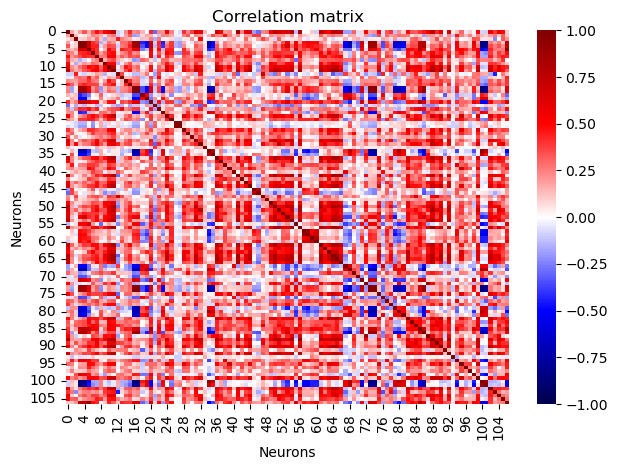

In [128]:
hcorr_idx = [corr[wormID]['hcorr'] for wormID in corr.keys()]
lcorr_idx = [corr[wormID]['lcorr'] for wormID in corr.keys()]

aux_matrix = np.zeros((302,302))

h_corr_matrix = []
l_corr_matrix = []

for i, _ in enumerate(corr.keys()):
    aux_matrix[hcorr_idx[i][:, 0], hcorr_idx[i][:, 1]] += 1
    h_corr_matrix.append(corr_matrix.copy())
    aux_matrix[lcorr_idx[i][:, 0], lcorr_idx[i][:, 1]] -= 1
    l_corr_matrix.append(corr_matrix.copy())

plotHeatmap(corr_matrix, title="Correlation matrix", cmap='seismic', show_xticks=True, show_yticks=True, xlabel='Neurons', ylabel='Neurons', vmin=-1, vmax=1)